In [2]:
import sys
!{sys.executable} -m pip install librosa

  Using cached librosa-0.8.0.tar.gz (183 kB)
  Using cached audioread-2.1.9.tar.gz (377 kB)
  Using cached resampy-0.2.2.tar.gz (323 kB)
  Using cached SoundFile-0.10.3.post1-py2.py3.cp26.cp27.cp32.cp33.cp34.cp35.cp36.pp27.pp32.pp33-none-win_amd64.whl (689 kB)
  Using cached pooch-1.3.0-py3-none-any.whl (51 kB)
  Created wheel for librosa: filename=librosa-0.8.0-py3-none-any.whl size=201375 sha256=7429ff5729b6061c5e5151996bb46538b6707a53435d613e1d2cec778d65e260
  Stored in directory: c:\users\owner\appdata\local\pip\cache\wheels\aa\5a\92\d52f6f8560ff05a2525e6030a1903412df876714241fb76802
  Created wheel for audioread: filename=audioread-2.1.9-py3-none-any.whl size=23141 sha256=5ede450e49db63f6d840e6374e1fdc79541a84c01cad54407a64466b50e069ec
  Stored in directory: c:\users\owner\appdata\local\pip\cache\wheels\49\5a\e4\df590783499a992a88de6c0898991d1167453a3196d0d1eeb7
  Created wheel for resampy: filename=resampy-0.2.2-py3-none-any.whl size=320718 sha256=ca0cd5d3aa67c1411b3195bd3e980292

In [7]:
tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)
beat_times = librosa.frames_to_time(beat_frames, sr=sr)
print(beat_times)

[ 1.92725624  2.39165533  2.87927438  3.36689342  3.85451247  4.31891156
  4.82975057  5.34058957  5.85142857  6.36226757  6.87310658  7.38394558
  7.89478458  8.42884354  8.91646259  9.40408163  9.89170068 10.37931973
 10.84371882 11.30811791 11.79573696 12.28335601 12.7477551  13.23537415
 13.7229932  14.21061224 14.67501134 15.13941043 15.60380952 16.11464853
 16.62548753 17.15954649 17.67038549 18.15800454 18.64562358 19.13324263
 19.64408163 20.13170068 20.59609977 21.06049887 21.54811791 22.03573696
 22.50013605 23.01097506 23.47537415 23.93977324 24.42739229 24.89179138
 25.37941043 25.86702948 26.37786848 26.88870748 27.37632653 27.84072562
 28.30512472 28.74630385 29.2339229  29.698322   30.16272109 30.62712018
 31.09151927 31.57913832 32.08997732 32.60081633 33.06521542 33.55283447
 34.04045351 34.52807256 34.99247166 35.4800907  35.96770975 36.47854875
 36.9661678  37.45378685 37.91818594 38.38258503 38.87020408 39.33460317
 39.82222222 40.28662132 40.75102041 41.19219955 41

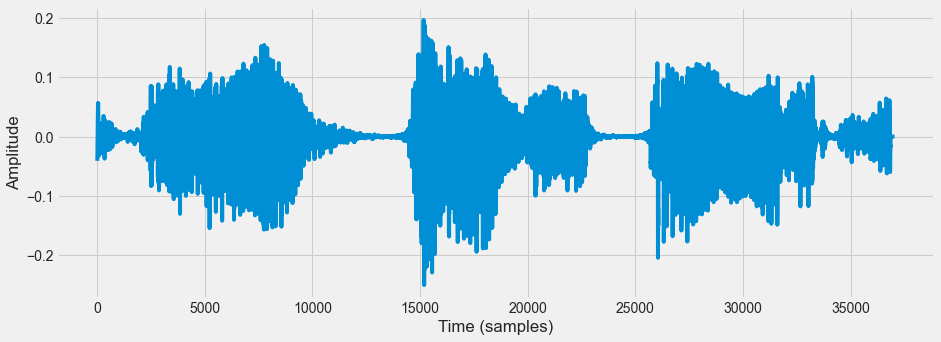

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import librosa
import IPython.display 
from IPython.display import Image

y, sr = librosa.load('Audio File\JnTExpressx0.5.wav')
y_harmonic, y_percussive = librosa.effects.hpss(y)

plt.figure(figsize=(14,5))
plt.plot(y_percussive)
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
IPython.display.Audio(data=y, rate=sr)

[[-6.6961835e+02 -6.6932776e+02 -6.5812726e+02 ... -6.6961835e+02
  -6.6961835e+02 -6.6961835e+02]
 [ 0.0000000e+00  4.1058493e-01  1.3920063e+01 ...  0.0000000e+00
   0.0000000e+00  0.0000000e+00]
 [ 0.0000000e+00  4.0943676e-01  1.1762684e+01 ...  0.0000000e+00
   0.0000000e+00  0.0000000e+00]
 ...
 [ 0.0000000e+00  3.7933171e-01  2.1862426e-01 ...  0.0000000e+00
   0.0000000e+00  0.0000000e+00]
 [ 0.0000000e+00  3.7427953e-01 -2.1098959e+00 ...  0.0000000e+00
   0.0000000e+00  0.0000000e+00]
 [ 0.0000000e+00  3.6929977e-01 -1.2029119e+00 ...  0.0000000e+00
   0.0000000e+00  0.0000000e+00]]


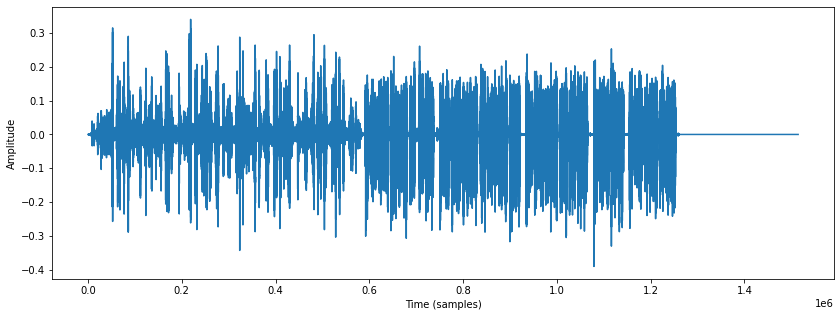

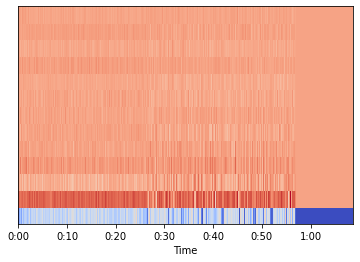

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import librosa
import IPython.display 
from IPython.display import Image
import librosa.display

y, sr = librosa.load('Audio File\JnTx1.5.wav')
y_harmonic, y_percussive = librosa.effects.hpss(y)

mfcc = librosa.feature.mfcc(y=y_percussive, sr=sr, n_mfcc=13)
print(mfcc)

plt.figure(figsize=(14,5))
plt.plot(y_percussive)
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.show()

librosa.display.specshow(mfcc, x_axis='time')


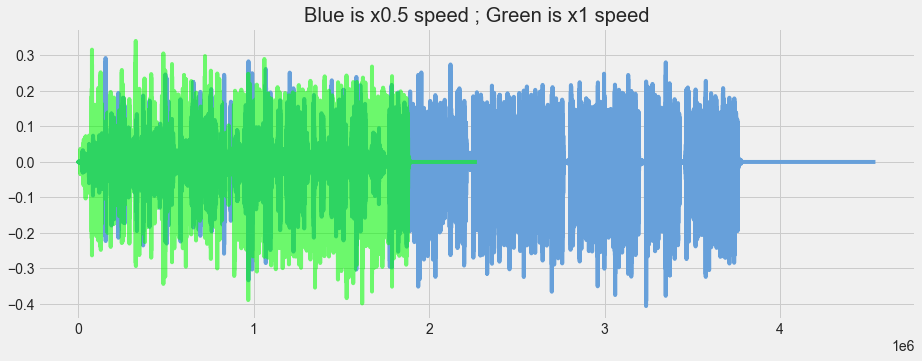

In [22]:
import librosa
import matplotlib.pyplot as plt
import IPython.display 
from IPython.display import Image
import librosa.display
from scipy.spatial.distance import euclidean
from fastdtw import fastdtw

y1, sr1 = librosa.load('Audio File\JnTx1Full.wav')
y2, sr2 = librosa.load('Audio File\JnTx0.5Full.wav')
y_harmonic1, y_percussive1 = librosa.effects.hpss(y1)
y_harmonic2, y_percussive2 = librosa.effects.hpss(y2)

plt.style.use('fivethirtyeight')

plt.figure(figsize=(14,5))
jnt_compare = plt.subplot(1,1,1)
jnt_compare.plot(y_percussive2, color='#67A0DA')
jnt_compare.plot(y_percussive1, color='#00FF00', alpha=0.55)
plt.title("Blue is x0.5 speed ; Green is x1 speed")

plt.show()